In [1]:
# Import main libraries
import pandas as pd 
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from collections import Counter
import datetime
from wordcloud import WordCloud
import nltk

pd.options.mode.chained_assignment = None  # default='warn'. This avoids a chained_assignment warning 

# Exploratory Analysis

In [2]:
df = pd.read_csv(r'YOUR_PATH_TO\banking app data.csv')

In [3]:
df.head()

,Date,Score,Translated comment,Original comment,externalId,bank,country,device
0,10-09-2018,9,Just very good and easy to use,Just very good and easy to use,NaN,lloyds bank mobile banking,global,android
1,10-09-2018,10,Quick too,Quick too,NaN,lloyds bank mobile banking,global,android
2,10-09-2018,10,Its much faster then laptop.,Its much faster then laptop.,NaN,lloyds bank mobile banking,global,android
3,10-09-2018,2,"slow, clunky. useful but poor interface","slow, clunky. useful but poor interface",NaN,lloyds bank mobile banking,global,android
4,10-09-2018,9,makes my life much easier,makes my life much easier,NaN,lloyds bank mobile banking,global,android


In [4]:
# Check for missing values
df.isna().sum() 

Date                      0
Score                     0
Translated comment        2
Original comment          3
externalId            25000
bank                      0
country                   0
device                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                25000 non-null  object 
 1   Score               25000 non-null  int64  
 2   Translated comment  24998 non-null  object 
 3   Original comment    24997 non-null  object 
 4   externalId          0 non-null      float64
 5   bank                25000 non-null  object 
 6   country             25000 non-null  object 
 7   device              25000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [6]:
# Convert date as obj to date as datetime64
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [7]:
# Check countries
country_names = df.country.unique()

country_names

array(['global', 'united states', 'finland', 'belgium'], dtype=object)

In [8]:
# Check bank names
bank_names = df.bank.unique()

bank_names

array(['lloyds bank mobile banking', 'bank of america - mobile banking',
       'hsbc mobile banking', 'nordea mobile bank finland', 'op-mobile',
       's-mobiili', 'belfius mobile'], dtype=object)

In [9]:
# Explore each region
df_Global = df[df['country']=='global']
df_US = df[df['country']=='united states']
df_Finland = df[df['country']=='finland']
df_Belgium = df[df['country']=='belgium']

In [10]:
print(df_Global.shape)
print(df_US.shape)
print(df_Finland.shape)
print(df_Belgium.shape)

(15142, 8)
(9595, 8)
(223, 8)
(40, 8)


In [11]:
df_Finland.head()

,Date,Score,Translated comment,Original comment,externalId,bank,country,device
34,2018-10-09,6,Online pay. Even if you could watch the online...,Verkkopalkka. Vielä kun pääsisi katsomaan verk...,NaN,nordea mobile bank finland,finland,iphone
35,2018-10-09,4,Add android N support. Cannot use due to andro...,Add android N support. Cannot use due to andro...,NaN,op-mobile,finland,android
36,2018-10-09,4,Support your iPad. Support for iPad ois jees,Tuki iPadille. Tuki iPadille ois jees,NaN,s-mobiili,finland,iphone
37,2018-10-09,10,"Easy, useful and pretty. I like it a lot. It's...","Helppo, hyödyllinen ja nätti. Tykkään paljon. ...",NaN,s-mobiili,finland,iphone
38,2018-10-09,6,Ok app but why still need to show the card in ...,Ok sovellus mutta miksi vielä tarvitsee näyttä...,NaN,s-mobiili,finland,iphone


In [12]:
# Calculate the average score by country
mean_global = df_Global['Score'].mean()
mean_US = df_US['Score'].mean()
mean_Finland = df_Finland['Score'].mean()
mean_Belgium = df_Belgium['Score'].mean()

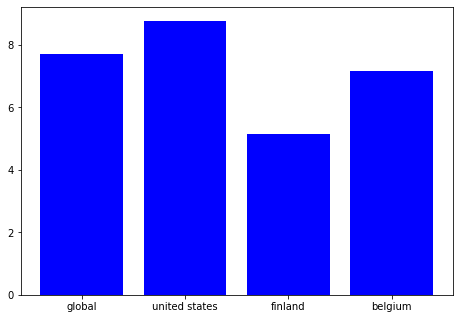

In [13]:
countries = list(country_names)
means = [mean_global, mean_US, mean_Finland, mean_Belgium]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries,means, color='b')
plt.show(means)

In [14]:
# Create subsets of the dataset to explore the banks' performance
df_lloyds = df[df['bank']=='lloyds bank mobile banking']
df_BoA = df[df['bank']=='bank of america - mobile banking']
df_hsbc = df[df['bank']=='hsbc mobile banking']
df_nordea = df[df['bank']=='nordea mobile bank finland']
df_op_mobile = df[df['bank']=='op-mobile']
df_s_mobiili = df[df['bank']=='s-mobiili']
df_belfius = df[df['bank']=='belfius mobile']

In [15]:
# Calculate the average score by bank
print('Average score for Lloyds is: {}'.format(df_lloyds['Score'].mean()))
print('Average score for BoA is: {}'.format(df_BoA['Score'].mean()))
print('Average score for hsbc is: {}'.format(df_hsbc['Score'].mean()))
print('Average score for nordea is: {}'.format(df_nordea['Score'].mean()))
print('Average score for op-mobile is: {}'.format(df_op_mobile['Score'].mean()))
print('Average score for s-mobiili is: {}'.format(df_s_mobiili['Score'].mean()))
print('Average score for Belfius mobile is: {}'.format(df_belfius['Score'].mean()))

Average score for Lloyds is: 8.352808988764044
Average score for BoA is: 8.769122503112651
Average score for hsbc is: 2.0555555555555554
Average score for nordea is: 3.8484848484848486
Average score for op-mobile is: 6.311111111111111
Average score for s-mobiili is: 4.895522388059701
Average score for Belfius mobile is: 7.828025477707007


In [16]:
df_hsbc.tail()

,Date,Score,Translated comment,Original comment,externalId,bank,country,device
24911,2018-02-04,2,I can not transfer money to new accounts. The ...,I can not transfer money to new accounts. The ...,NaN,hsbc mobile banking,global,android
24912,2018-02-04,2,Im not sure whats going on but lately when I l...,Im not sure whats going on but lately when I l...,NaN,hsbc mobile banking,global,android
24913,2018-02-04,1,For the last several weeks the app crashes whe...,For the last several weeks the app crashes whe...,NaN,hsbc mobile banking,global,android
24914,2018-02-04,0,"Useless app, does not work on mobile connectio...","Useless app, does not work on mobile connectio...",NaN,hsbc mobile banking,global,android
24997,2018-01-04,0,Trash. Complete trash of an app. Takes forever...,Trash. Complete trash of an app. Takes forever...,NaN,hsbc mobile banking,united states,iphone


In [17]:
df_hsbc['Score'].value_counts()

1     746
0     708
2     158
3     141
10     86
9      84
6      55
5      50
7      46
4      36
8      32
Name: Score, dtype: int64

In [18]:
df_nordea['Score'].value_counts()

2     41
6     10
10     8
4      6
8      1
Name: Score, dtype: int64

From this exploratory data analysis, it emerges that Hsbc and Nordea were the worst performing online banks. These scores call for an explanation and so my text analytics will probe into the matter.

# Preprocessing

I will perform some standard preprocessing of the text column "Translated comment", so as to then provide a first word frequency analysis.

In [19]:
# Tokenization with Regular Expressions
def tokenize(text):
    return re.findall(r'[\w]+', text)

In [20]:
#  Treating Stop Words
stopwords = set(nltk.corpus.stopwords.words('english'))

other_stopwords = ["everything", "since", "even", "ever", "please", "thanks",
                   "every", "go", "one", "get", "1", "2", "3", "4", "5", 
                   "6", "7", "8", "9", "10", "always", "still", "without", "done"]

stopwords = stopwords.union(set(other_stopwords))

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [21]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [22]:
df['Translated comment'] = df['Translated comment'].apply(lambda x: str(x)) 

df['tokens'] = df['Translated comment'].apply(prepare, pipeline=pipeline) # Create a new column with tokenized words

In [23]:
df.head()

,Date,Score,Translated comment,Original comment,externalId,bank,country,device,tokens
0,2018-10-09,9,Just very good and easy to use,Just very good and easy to use,NaN,lloyds bank mobile banking,global,android,"[good, easy, use]"
1,2018-10-09,10,Quick too,Quick too,NaN,lloyds bank mobile banking,global,android,[quick]
2,2018-10-09,10,Its much faster then laptop.,Its much faster then laptop.,NaN,lloyds bank mobile banking,global,android,"[much, faster, laptop]"
3,2018-10-09,2,"slow, clunky. useful but poor interface","slow, clunky. useful but poor interface",NaN,lloyds bank mobile banking,global,android,"[slow, clunky, useful, poor, interface]"
4,2018-10-09,9,makes my life much easier,makes my life much easier,NaN,lloyds bank mobile banking,global,android,"[makes, life, much, easier]"


# Frequency analysis

## Word frequencies

In [24]:
counter = Counter()
df['tokens'].map(counter.update)

print(counter.most_common(30))

[('app', 17128), ('easy', 7145), ('use', 6319), ('great', 5716), ('love', 4625), ('banking', 3287), ('bank', 2881), ('good', 2824), ('need', 1810), ('works', 1793), ('like', 1729), ('convenient', 1672), ('account', 1625), ('time', 1552), ('check', 1410), ('best', 1383), ('money', 1248), ('mobile', 1198), ('boa', 1195), ('accounts', 1100), ('really', 1079), ('user', 1054), ('never', 1012), ('well', 1004), ('friendly', 947), ('work', 937), ('using', 925), ('makes', 914), ('much', 893), ('better', 887)]


In [25]:
# A function that counts freqs and sort words in the dataframe by their freqs
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
   
    return freq_df.sort_values('freq', ascending=False)

In [39]:
count_words(df, 'tokens').head(20)

,freq
token,
app,17128
easy,7145
use,6319
great,5716
love,4625
banking,3287
bank,2881
good,2824
need,1810


In [26]:
#A function to generate word clouds based on frequency counts
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=900, height=600,
                   background_color= 'black', colormap='Paired',
                   max_font_size=150, max_words=max_words)

    # convert DataFrame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:      
         counter = word_freq
    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items()
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)

    plt.title(title)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')

In [27]:
stopwords = stopwords.union(set(other_stopwords))

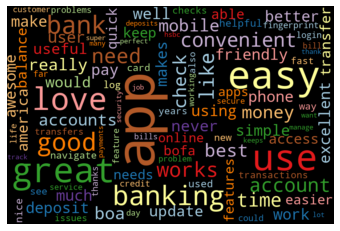

In [27]:
# Word cloud for all dataset
freq_df = count_words(df, 'tokens')
plt.figure()
wordcloud(freq_df['freq'], max_words=100, stopwords=stopwords)

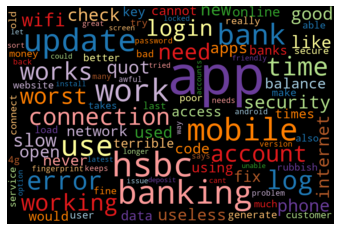

In [29]:
# Word cloud of hsbc
freq_df = count_words(df_hsbc, 'tokens')
plt.figure()
wordcloud(freq_df['freq'], max_words=100, stopwords=stopwords)

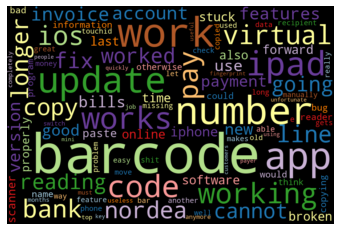

In [29]:
# Word cloud of nordea
freq_df = count_words(df_nordea, 'tokens')
plt.figure()
wordcloud(freq_df['freq'], max_words=100, stopwords=stopwords)

From this first analysis, it looks like "app" and "barcode" are the most frequent words in the comments to the services of, respectively, Hsbc and Nordea. Let's further investigate what users say about them.

# Using grammatical relations to analyze frequencies


Let's now further explore the word frequencies using grammatical relations as a guide. In particular, let's try to identify: (i) things that users talk about and ways of characterizing them, (ii) things that are said about them (predicates). 

In [42]:
# Lower text
df['Translated comment_lowered'] = df['Translated comment'].apply(lambda x: str(x).lower())

# Get rid of unused columns
df.drop(['Original comment', 'externalId', 'tokens', 'device'], axis=1)

,Date,Score,Translated comment,bank,country,Translated comment_lowered
0,2018-10-09,9,Just very good and easy to use,lloyds bank mobile banking,global,just very good and easy to use
1,2018-10-09,10,Quick too,lloyds bank mobile banking,global,quick too
2,2018-10-09,10,Its much faster then laptop.,lloyds bank mobile banking,global,its much faster then laptop.
3,2018-10-09,2,"slow, clunky. useful but poor interface",lloyds bank mobile banking,global,"slow, clunky. useful but poor interface"
4,2018-10-09,9,makes my life much easier,lloyds bank mobile banking,global,makes my life much easier
...,...,...,...,...,...,...
24995,2018-01-04,9,"Quick and effective, especially with the finge...",bank of america - mobile banking,global,"quick and effective, especially with the finge..."
24996,2018-01-04,7,Great,bank of america - mobile banking,global,great
24997,2018-01-04,0,Trash. Complete trash of an app. Takes forever...,hsbc mobile banking,united states,trash. complete trash of an app. takes forever...
24998,2018-01-04,10,Saves me a trip to bank. Love this app I can d...,bank of america - mobile banking,united states,saves me a trip to bank. love this app i can d...


In [43]:
import spacy 
    
#Load the English model
nlp = spacy.load("en_core_web_sm") 

In [44]:
# A function that detects nouns+adjectives.
# This functions has a flexible argument: when set to "Counter", the function returns list.
# Otherwise, it returns string.
def adj_nouns_selector(text, *args):
    adj_nouns = []
    doc = nlp(text)
    for possible_adj_noun in doc:
        if possible_adj_noun.pos_ == "NOUN" and possible_adj_noun.text not in stopwords:
            for j in possible_adj_noun.children:
                if j.pos_ == "ADJ" and j.text not in stopwords:
                    adj_nouns.append(j.lemma_ + " " + possible_adj_noun.lemma_) 
        
    if args[0] == "Counter":
        return adj_nouns
    else:
        return ", ".join(adj_nouns)

In [ ]:
# A function that detects predicates (verbs + negation or adverbs)
def predicates_selector(text):
    predicates = []
    doc = nlp(text)
    for possible_verb in doc:
        if possible_verb.pos_ == "VERB" and possible_verb.text not in stopwords:
            for j in possible_verb.children:
                if j.dep_ == "neg" or j.dep_=="advmod":
                    predicates.append(j.text + " " + possible_verb.lemma_)
                
    return predicates #", ".join(predicates)

The two functions about extract adj-noun pairs and predicates. These functions will be used to detect possible topics and things user say about them. However, in addition, we need a function that will allow us to output the broader contexts in which words appear. The function below does this job.

In [83]:
# A function to extract keywords and their surrounding contexts parameterized as window
import textacy
from textacy import extract
import random

def kwic(doc_series, keyword, window=30, print_samples=5):
    def add_kwic(text):
        kwic_list.extend(textacy.extract.kwic.keyword_in_context(text, keyword, ignore_case=True,
        window_width=window, pad_context=False))
    
    kwic_list = []
    doc_series.map(add_kwic)
    
    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+' '+ sample[1]+' '+ re.sub(r'[\n\t]', ' ', sample[2]))

## Analysis of hsbc

In [45]:
# Rerun this cell
df_hsbc = df[df['bank']=='hsbc mobile banking']

In [46]:
# Generate a new column containing list of strings composed by nouns and their adjectives.
df_hsbc['Adj_Nouns'] = df_hsbc['Translated comment_lowered'].apply(lambda x: adj_nouns_selector(x, "Counter"))

In [47]:
print(df_hsbc['Adj_Nouns'].head())
print(df_hsbc['Adj_Nouns'].tail())

30                                   [1st day, bad app]
31                                           [easy app]
32                                                   []
33                                          [much time]
65    [horrible app, financial app, many app, financ...
Name: Adj_Nouns, dtype: object
24911                                        [new account]
24912       [long time, financial security, multiple time]
24913    [last week, several week, first comment, disma...
24914                     [useless app, mobile connection]
24997                   [complete trash, decent developer]
Name: Adj_Nouns, dtype: object


In [48]:
# Show frequencies of adj-noun pairs
counter_ADJ_NOUNS = Counter()
df_hsbc['Adj_Nouns'].map(counter_ADJ_NOUNS.update) 

print(counter_ADJ_NOUNS.most_common(20))

[('bad app', 115), ('mobile datum', 65), ('mobile banking', 55), ('mobile app', 45), ('online banking', 39), ('secure key', 32), ('last update', 32), ('good app', 29), ('useless app', 29), ('late update', 29), ('terrible app', 28), ('fast balance', 27), ('new version', 19), ('recent update', 19), ('new phone', 18), ('friendly user', 17), ('new update', 17), ('mobile network', 15), ('big bank', 15), ('new payee', 14)]


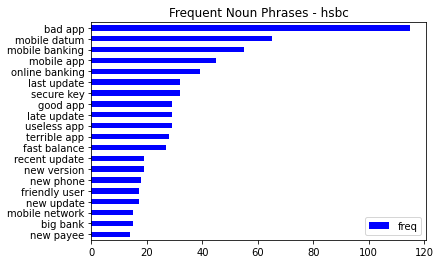

In [49]:
count_words(df_hsbc, 'Adj_Nouns').head(20).plot(kind='barh', xlabel='', color='b', title='Frequent Noun Phrases - hsbc').invert_yaxis()

Let's have a look at co-occurrence matrix to further explore relations between nouns and adjectives.

In [50]:
### Create co-occurrence matrix
# Import sklearn countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

# First, create list of most common noun-adj pairs
most_freq_adj_nouns_list= [j for (j, k)  in counter_ADJ_NOUNS.most_common(30)]

# Now, convert a collection of text documents to a matrix of token counts
cv = CountVectorizer(ngram_range=(1,1))

df_hsbc['Adj_Nouns_str'] = df_hsbc['Translated comment_lowered'].apply(adj_nouns_selector, args="str")

list_adj_nouns = df_hsbc['Adj_Nouns_str'].tolist()

list_adj_nouns2 = [t for t in list_adj_nouns if t in most_freq_adj_nouns_list]


# matrix of token counts
X = cv.fit_transform(list_adj_nouns2)
Xc = (X.T * X) # matrix manipulation
Xc.setdiag(0) # set the diagonals to be zeroes as it's pointless to be 1


names = cv.get_feature_names_out() # This are the entity names (i.e. keywords)
df_hsbc_adj_nouns = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

In [62]:
df_hsbc_adj_nouns.head(10)

,app,bad,balance,bank,banking,big,connection,datum,digital,fast,...,poor,recent,secure,terrible,update,useless,user,version,well,wi
app,0,46,0,0,0,0,0,0,0,0,...,1,0,0,11,0,11,0,0,2,0
bad,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
balance,0,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
bank,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
banking,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
big,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
connection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
datum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
digital,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fast,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

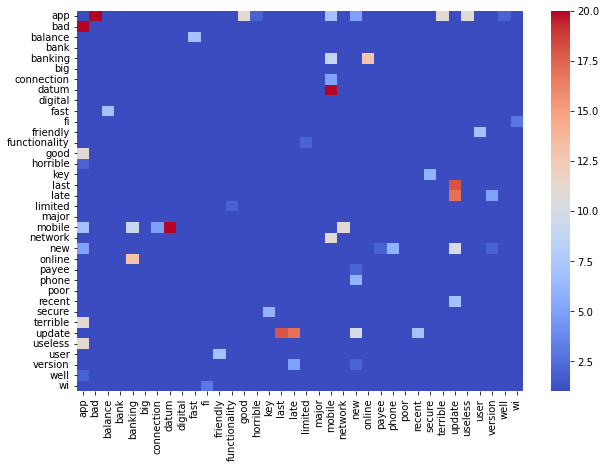

In [61]:
# Visualize co-occurrence matrix with a heatmap
import seaborn as sns
sns.set_palette("pastel")
plt.figure(figsize=(10, 7))

sns.heatmap(df_hsbc_adj_nouns, xticklabels=1, yticklabels=1, vmin=1, vmax= 20, cmap="coolwarm")

From this analysis, it looks like hsbc users have problems with the app of this online banking service. A potential cause of dissatisfaction may be related to updates, which are often mentioned. Let's see whether an analysis of predicates can tell us something more about the issues with the hsbc app.

In [ ]:
df_hsbc['Predicates'] = df_hsbc['Translated comment_lowered'].apply(predicates_selector)

In [68]:
print(df_hsbc['Predicates'].head())
print(df_hsbc['Predicates'].tail())

30                     [ever use, not suppose]
31                                          []
32                                          []
33                                          []
65    [never use, horribly design, close come]
Name: Predicates, dtype: object
24911                                       [not transfer]
24912    [when log, lately come, again log, easier chec...
24913                                          [when open]
24914                                 [not work, not know]
24997    [forever take, n't work, even work, only work,...
Name: Predicates, dtype: object


In [69]:
# Show frequencies
counter_PREDICATES = Counter()
df_hsbc['Predicates'].map(counter_PREDICATES.update) #CASE1 = list. For update to work, df['Adj_Nouns'] must include lists. 

print(counter_PREDICATES.most_common(30))

[("n't work", 131), ('not work', 115), ("n't open", 52), ('fine work', 47), ('only work', 39), ('again try', 32), ('never work', 31), ("n't connect", 30), ('ever use', 29), ("n't log", 29), ('now work', 29), ('even open', 28), ("n't use", 27), ('not open', 24), ('later try', 23), ("n't login", 22), ("n't let", 20), ("n't load", 20), ('not connect', 19), ('when try', 19), ('still work', 19), ('longer work', 19), ('now use', 18), ('when use', 17), ('nt work', 17), ('not use', 16), ('all work', 16), ("n't access", 15), ('when work', 15), ("n't install", 14)]


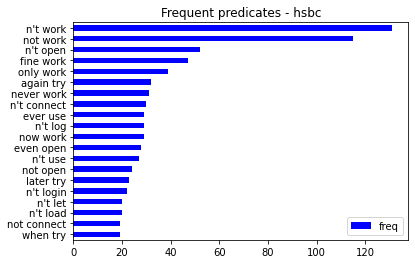

In [70]:
count_words(df_hsbc, 'Predicates').head(20).plot(kind='barh', 
                                                 xlabel='',  color='b', 
                                                 title='Frequent predicates - hsbc').invert_yaxis()

As you can see, negated verbs appear quite often. We can infer that the app does not do its job. To check for more context, let's have a look at what the function kwic returns for the word "update".

In [84]:
kwic(df_hsbc['Translated comment'], 'update')

5 random samples out of 377 contexts for 'update':
pp upgrade.... still waiting!  Update : I've closed my account and m
After last  update  it is crashing on my tablet
what's happened in the latest  update s but it just hand and doesn't
 it. Thanks for requiring the  update , now I have an unusable app.
Had an  update  where I'm no longer able to c


We can see that the users of the hsbc app have had issues with some updates that made the app malfunctioning.

## Analysis of Nordea

In [85]:
# Rerun:
df_nordea = df[df['bank']=='nordea mobile bank finland']

# Apply the adj_nouns_selector function
df_nordea['Adj_Nouns'] = df_nordea['Translated comment_lowered'].apply(lambda x: adj_nouns_selector(x, "Counter"))

In [86]:
df_nordea.Adj_Nouns.head()

34             [online pay, online pay]
169                                  []
312                                  []
313                                  []
315    [online banking, polished whole]
Name: Adj_Nouns, dtype: object

In [87]:
# Show frequencies
counter_ADJ_NOUNS = Counter()
df_nordea['Adj_Nouns'].map(counter_ADJ_NOUNS.update) 

print(counter_ADJ_NOUNS.most_common(20))

[('barcode number', 19), ('virtual line', 8), ('last update', 4), ('barcode reader', 4), ('new update', 3), ('barcode scanner', 3), ('online pay', 2), ('next update', 2), ('mobile bank', 2), ('bad bank', 2), ('new feature', 2), ('long time', 2), ('online bank', 2), ('online banking', 1), ('polished whole', 1), ('early version', 1), ('lousy father', 1), ('many feature', 1), ('well app', 1), ('big update', 1)]


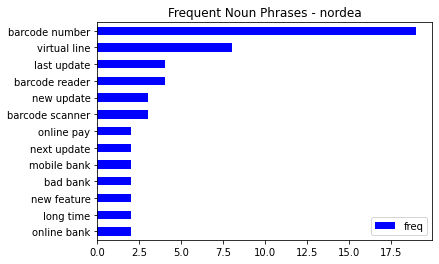

In [88]:
count_words(df_nordea, 'Adj_Nouns').head(20).plot(kind='barh', 
                                                  xlabel='',  
                                                  color='b', 
                                                  title='Frequent Noun Phrases - nordea').invert_yaxis()

Seems like the barcode reader feature may be problematic. Let's investigate whethere there is an issue with it.

In [89]:
# Apply the predicates_selector function
df_nordea['Predicates'] = df_nordea['Translated comment_lowered'].apply(predicates_selector)

In [90]:
print(df_nordea['Predicates'].head())
print(df_nordea['Predicates'].tail())

34                                          [even watch]
169                             [not work, always throw]
312             [not work, n't pay, all pay, always get]
313    [only work, partially work, only transfer, not...
315                           [still lack, when compare]
Name: Predicates, dtype: object
4369    [well work, unfortunately say, n't say, manual...
4370                                         [also carry]
4371                                        [longer work]
4717                         [still support, not support]
4721                                         [least take]
Name: Predicates, dtype: object


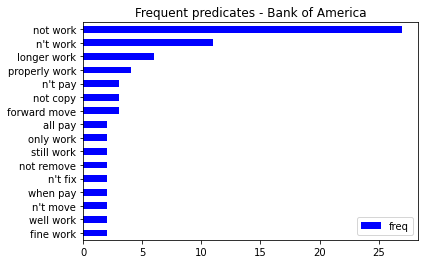

In [115]:
count_words(df_nordea, 'Predicates').head(20).plot(kind='barh', 
                                                   xlabel='',  
                                                   color='b', 
                                                   title='Frequent predicates - Bank of America').invert_yaxis()

In [92]:
kwic(df_nordea['Translated comment'], 'barcode')

5 random samples out of 52 contexts for 'barcode':
That  barcode .... It's the same problem as 
The  barcode  number is not working. Honest
 Barcode  NOT working. After reading th
It's going down. On iPad,  barcode  reading no longer works. I co
OT working. After reading the  barcode , the app gets stuck and there


As you can see, Nordea users have problems with reading their barcode number using the Nordea online service.

## Analysis of Bank of America

As a comparison, let's now have a look at the best performing bank.

In [106]:
# Rerun
df_BoA = df[df['bank']=='bank of america - mobile banking']

In [107]:
# Apply the adj_nouns_selector function
df_BoA['Adj_Nouns'] = df_BoA['Translated comment_lowered'].apply(lambda x: adj_nouns_selector(x, "Counter"))

In [109]:
df_BoA.Adj_Nouns.head()

17                    []
18            [big bank]
19                    []
20    [real possibility]
21                    []
Name: Adj_Nouns, dtype: object

In [111]:
# Show frequencies
counter_ADJ_NOUNS = Counter()
df_BoA['Adj_Nouns'].map(counter_ADJ_NOUNS.update) 

print(counter_ADJ_NOUNS.most_common(20))

[('friendly user', 206), ('mobile deposit', 87), ('easy access', 84), ('new feature', 82), ('great job', 80), ('good work', 76), ('good app', 72), ('real time', 69), ('great feature', 59), ('new update', 58), ('great service', 58), ('long time', 57), ('great way', 56), ('great tool', 52), ('good job', 49), ('mobile check', 48), ('❤ ️', 39), ('many year', 37), ('much time', 36), ('quick access', 35)]


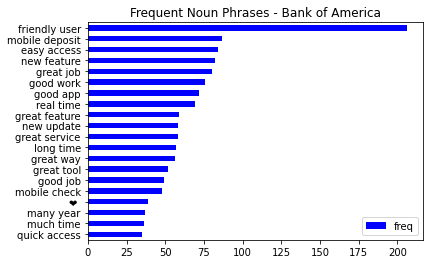

In [118]:
count_words(df_BoA, 'Adj_Nouns').head(20).plot(kind='barh', 
                                                  xlabel='',  
                                                  color='b', 
                                                  title='Frequent Noun Phrases - Bank of America').invert_yaxis()

In [112]:
# Apply the predicates_selector function
df_BoA['Predicates'] = df_BoA['Translated comment_lowered'].apply(predicates_selector)

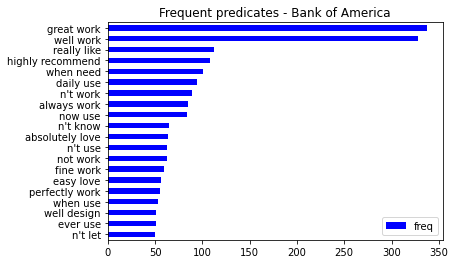

In [116]:
count_words(df_BoA, 'Predicates').head(20).plot(kind='barh', 
                                                   xlabel='',  
                                                   color='b', 
                                                   title='Frequent predicates - Bank of America').invert_yaxis()

We can see that BoA works well, insofar as it provides easy access and functioning features.

# LDA analysis

In [93]:
from gensim import corpora
from gensim.models import LdaModel
from operator import itemgetter

In [148]:
# Rerun:
stopwords = stopwords.union({"app", "bank", "banking", "hsbc", "apps"})
#df_hsbc['tokens'] = df_hsbc['Translated comment_lowered'].apply(prepare, pipeline=pipeline)
df_hsbc = df[df['bank']=='hsbc mobile banking']

In [150]:
# A function that detects adjectives.
# This returns a list containing adjectives.
def pos_nouns_selector(text):
    nouns = []
    doc = nlp(text) #Turn text into a spacy doc
    for i in doc:
        if i.pos_ == "NOUN" and i.text not in stopwords:
            nouns.append(i.text)
     
    return nouns

In [151]:
df_hsbc['Nouns'] = df_hsbc['Translated comment_lowered'].apply(pos_nouns_selector)

In [153]:
comments = df_hsbc['Nouns'].tolist() ## Turn index column into list
comments_dictionary = corpora.Dictionary(comments)
comments_corpus = [comments_dictionary.doc2bow(comment)  #Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples
                    for comment in comments]

np.random.seed(431)
comments_model = LdaModel( 
    comments_corpus, 
    id2word = comments_dictionary, 
    num_topics = 10,
    passes = 10,   
    iterations = 50)    

#comments_model.show_topics()

topics = comments_model.show_topics(num_words = 10, formatted = False)
topics

[(0,
  [('time', 0.07360899),
   ('data', 0.072113626),
   ('network', 0.051038306),
   ('connection', 0.041351933),
   ('account', 0.03949832),
   ('update', 0.03693367),
   ('wifi', 0.024713617),
   ('internet', 0.024106618),
   ('application', 0.02271553),
   ('times', 0.022102157)]),
 (1,
  [('internet', 0.10145751),
   ('connection', 0.078379706),
   ('times', 0.054072786),
   ('errors', 0.028785096),
   ('account', 0.02693314),
   ('trash', 0.026735213),
   ('reason', 0.026116675),
   ('stars', 0.022557536),
   ('help', 0.019744104),
   ('print', 0.01915697)]),
 (2,
  [('service', 0.07064731),
   ('key', 0.06393052),
   ('phone', 0.04987512),
   ('customer', 0.047956597),
   ('years', 0.043043897),
   ('website', 0.03716061),
   ('update', 0.02780586),
   ('country', 0.02605717),
   ('week', 0.023646291),
   ('needs', 0.022740783)]),
 (3,
  [('screen', 0.046176452),
   ('time', 0.04426119),
   ('problem', 0.03929011),
   ('login', 0.038938835),
   ('issue', 0.029615141),
   ('err

In [154]:
# Create Topic Distance Visualization 
import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(comments_model, comments_corpus, comments_dictionary)

lda_viz

C:\Users\fran8\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.197228 -0.086911       1        1  15.268554
4      0.184611 -0.092043       2        1  12.701986
5      0.086146  0.127165       3        1  11.900039
9     -0.148729  0.027307       4        1  11.874957
2      0.060670  0.005801       5        1  10.239511
7     -0.164559 -0.023898       6        1   9.697087
3     -0.043984  0.245679       7        1   9.636310
1     -0.006947 -0.211855       8        1   7.947108
6      0.184910 -0.017080       9        1   5.416947
8      0.045110  0.025833      10        1   5.317502, topic_info=          Term        Freq       Total Category  logprob  loglift
1        error  179.000000  179.000000  Default  30.0000  30.0000
53      update  272.000000  272.000000  Default  29.0000  29.0000
51    internet  148.000000  148.000000  Default  28.0000  28.0000
6         time  158.000000  158.000000  Default  27.0000  27.0000
15     balance   88.000000   88.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
53      update   25.148215  272.839020  Topic10  -2.8441   0.5501
118    service   10.148737   69.666910  Topic10  -3.7516   1.0078
456  questions    1.590154   14.906315  Topic10  -5.6051   0.6962
36       times    1.675901   82.747901  Topic10  -5.5526  -0.9653
30    security    1.408779  110.791781  Topic10  -5.7262  -1.4308

[466 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
356       1  0.719671          %
356       4  0.265142          %
1029      6  0.942554       25th
1315      7  0.913627      4.4.2
877      10  0.615082        90s
...     ...       ...        ...
980       7  0.365653  yesterday
1109      8  0.930297    zenfone
1304      9  0.898705   zenfone2
1064      9  0.463535          👎
1293     10  0.614873          😡

[555 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 6, 10, 3, 8, 4, 2, 7, 9])

From this analysis, other issues emerge. Users seem to be concerned with security, which in my run of the algorithm appear in topic 3 and topic 4. The word "time" also appears to be highly relevant, indicating likely dissatisfaction with the functionality offered by the service.

# Extra: Sentiment Analysis with BERT

## Import libraries and Amazon review dataset

In [127]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

In [128]:
df2 = pd.read_csv(r'YOUR_PATH_TO\amazon-reviews.csv')

df2.head()

,label,text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [130]:
df2.shape

(206593, 2)

In [131]:
df2 = df2[0:5000]

In [135]:
# Let's create a new column with values 1 for positive, 0 for negative

# Create a list of labels
possible_labels = df2.label.unique()

# Create a dict of labels whose values are unique id's
label_dict = {}

for index, possible_label in enumerate(possible_labels):
    if index == 0:
        label_dict[possible_label] = 1
    else:
        label_dict[possible_label] = 0
        
label_dict

df2['sentiment'] = df2.label.replace(label_dict)
df2.head()

,label,text,sentiment
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...,1
1,__label__2,One of the best game music soundtracks - for a...,1
2,__label__1,Batteries died within a year ...: I bought thi...,0
3,__label__2,"works fine, but Maha Energy is better: Check o...",1
4,__label__2,Great for the non-audiophile: Reviewed quite a...,1


In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2['text'], df2['sentiment'])

In [137]:
X_train.head(3)

4185    satisfied customer: I recently purchased a use...
871     Wow: This book is short, but man it packs a to...
133     shameful ripoff: even in the hour plus ''build...
Name: text, dtype: object

In [139]:
#Check if the new dataset is unbalanced
df2.groupby(['sentiment']).count()

,label,text
sentiment,,
0,2406,2406
1,2594,2594


## Pretraining BERT model

In [140]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

In [141]:
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4") # Takes time to load

In [142]:
# A function to get embeddings
def get_sentence_embedding(text):
    preprocessed_text = bert_preprocess(text)
    return bert_encoder(preprocessed_text)['pooled_output']

text = ['Excellent product, I love it', 'I did not enjoy the experience at all']

get_sentence_embedding(text)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7167475 , -0.21127044, -0.5797159 , ..., -0.49885184,
        -0.55062824,  0.7547973 ],
       [-0.75210977, -0.17280686,  0.13110209, ...,  0.09188548,
        -0.5274014 ,  0.8351277 ]], dtype=float32)>

## Building a functional model

In [143]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")

preprocessed_text = bert_preprocess(text_input)

outputs = bert_encoder(preprocessed_text)

# Neural network layers

l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output']) #first layer
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

# construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [144]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_mask': (None 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'default': (None, 7 109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [145]:
# Choose the metrics
Metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=Metrics)

In [155]:
# Fit
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
118/118 [==============================] - 846s 7s/step - loss: 0.5488 - accuracy: 0.7339 - precision: 0.7457 - recall: 0.7365
Epoch 2/10
118/118 [==============================] - 887s 8s/step - loss: 0.5386 - accuracy: 0.7421 - precision: 0.7472 - recall: 0.7576
Epoch 3/10
118/118 [==============================] - 843s 7s/step - loss: 0.5294 - accuracy: 0.7485 - precision: 0.7510 - recall: 0.7684
Epoch 4/10
118/118 [==============================] - 844s 7s/step - loss: 0.5161 - accuracy: 0.7675 - precision: 0.7801 - recall: 0.7664
Epoch 5/10
118/118 [==============================] - 2380s 20s/step - loss: 0.5062 - accuracy: 0.7701 - precision: 0.7836 - recall: 0.7674
Epoch 6/10
118/118 [==============================] - 1040s 9s/step - loss: 0.4927 - accuracy: 0.7757 - precision: 0.7827 - recall: 0.7839
Epoch 7/10
118/118 [==============================] - 1153s 10s/step - loss: 0.4907 - accuracy: 0.7784 - precision: 0.7879 - recall: 0.7818
Epoch 8/10
118/118 [=========

In [156]:
model.evaluate(X_test, y_test)

40/40 [==============================] - 331s 8s/step - loss: 0.4528 - accuracy: 0.8088 - precision: 0.8514 - recall: 0.7695


[0.45276835560798645,
 0.8087999820709229,
 0.8513513803482056,
 0.7694656252861023]

In [157]:
review = "I love the product"

In [158]:
model.predict([review])

array([[0.664909]], dtype=float32)

In [164]:
list_predictions = []

for comment in df['Translated comment_lowered'][10:20]:
    list_predictions.append(model.predict([comment]))

In [160]:
list_predictions

[array([[0.6019961]], dtype=float32),
 array([[0.80168235]], dtype=float32),
 array([[0.48479098]], dtype=float32),
 array([[0.54115814]], dtype=float32),
 array([[0.52918464]], dtype=float32),
 array([[0.7604755]], dtype=float32),
 array([[0.35682744]], dtype=float32),
 array([[0.58994734]], dtype=float32),
 array([[0.8514957]], dtype=float32),
 array([[0.67440295]], dtype=float32)]

In [166]:
df['Translated comment_lowered'][10:20]

10                                          easy to use
11                                   really easy to use
12    app works, it's great in what it does but it's...
13                    easy and simple to use. love it 😍
14    would get more stars if fingerprint login work...
15                                  makes payments easy
16                                          easy to use
17    love it!. addicted to mobile banking... i have...
18    wow 5 stars!. i shouldn't be surprised to see ...
19    love bank of america. love the boa app so easy...
Name: Translated comment_lowered, dtype: object